In [26]:
import pandas as pd

# Load the data
file_path = 'results_temp/comparison_optimal_500.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe and a summary of the data
data


,IpwEpsGreedy,IpwBootTS,RandomAction,eps_greedy_policy,optimal_outcome_actions,optimal_policy,optimal_outcome_policy
0,2758.583786,2928.739839,2710.556882,66,4066.350544,88,3504.939130
1,3080.634350,3513.963668,2530.810135,66,4449.930195,88,3501.801837
2,3849.241803,3795.950639,3368.870548,29,4348.424224,36,4060.950011
3,3226.087554,3358.558738,2764.454110,29,4261.068828,25,3220.646968
4,3447.789650,3351.477990,3180.469780,29,4424.626732,97,3583.248661
5,3116.846481,3662.979464,2944.152469,88,4444.566679,25,3242.537825
6,3554.336203,3201.055313,2761.360876,29,3807.644135,97,3264.304703
7,2964.626275,3130.561662,3039.202842,28,4226.282096,29,3905.908499
8,3639.089522,3359.212493,2887.056072,29,4416.079028,29,3457.614571
9,3394.223837,3899.266309,3160.075259,66,4456.590973,29,3671.253668


/Users/yiyang/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yiyang/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/yiyang/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yiyang/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

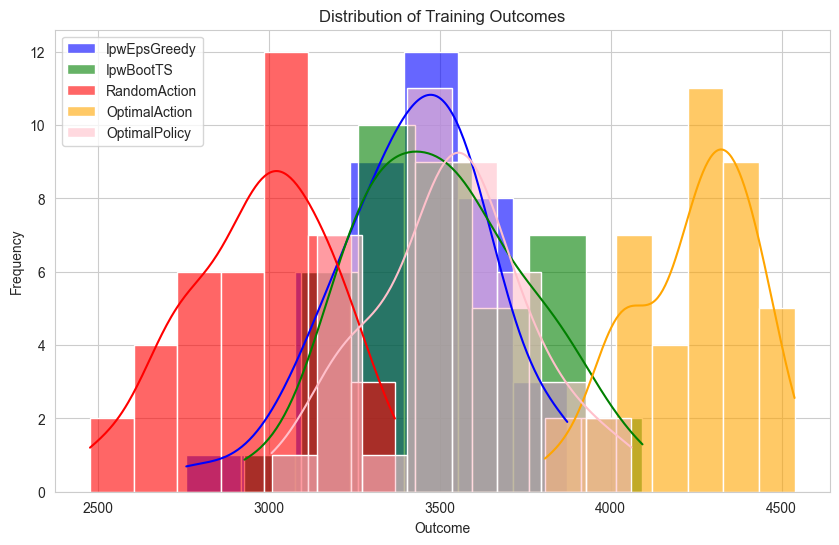

(-1.6293063842804256, 0.10728050798325219)

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# Set the style of the visualizations
sns.set_style("whitegrid")

# Plot the distributions of both methods
plt.figure(figsize=(10, 6))
sns.histplot(data['IpwEpsGreedy'], color="blue", kde=True, label='IpwEpsGreedy', alpha=0.6)
sns.histplot(data['IpwBootTS'], color="green", kde=True, label='IpwBootTS', alpha=0.6)
sns.histplot(data['RandomAction'], color="red", kde=True, label='RandomAction', alpha=0.6)
sns.histplot(data['optimal_outcome_actions'], color="orange", kde=True, label='OptimalAction', alpha=0.6)
sns.histplot(data['optimal_outcome_policy'], color="pink", kde=True, label='OptimalPolicy', alpha=0.6)

plt.title('Distribution of Training Outcomes')
plt.xlabel('Outcome')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Conduct a two-sample t-test to compare the means
t_stat, p_value = ttest_ind(data['IpwEpsGreedy'], data['IpwBootTS'])

t_stat, p_value


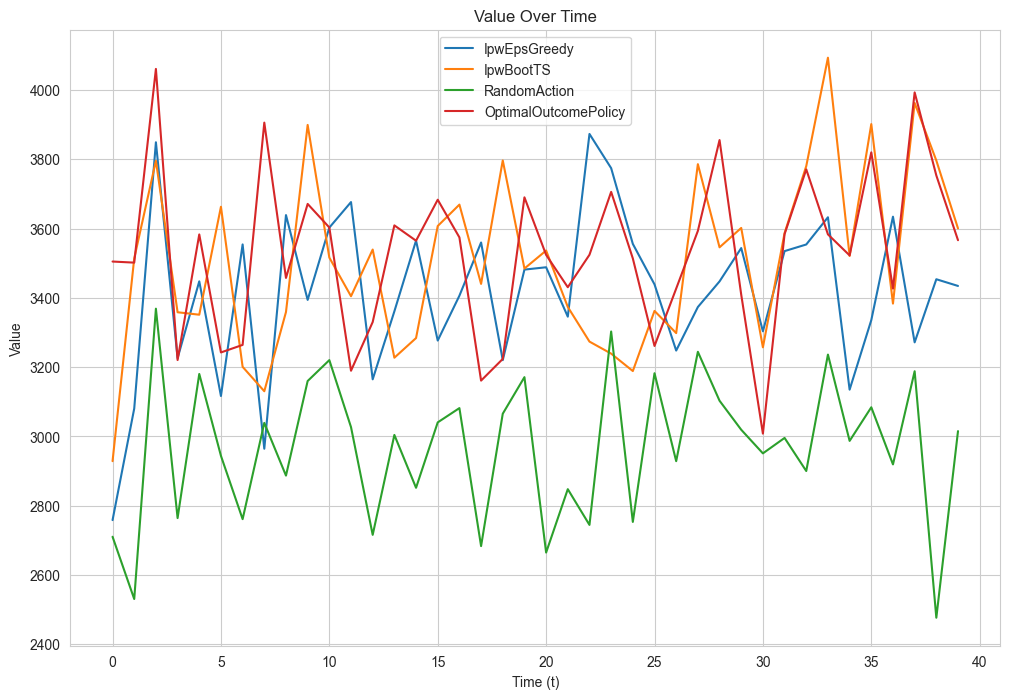

In [28]:
import matplotlib.pyplot as plt

# Assuming row index as the time variable for plotting
# Let's plot a few selected columns to keep the plot readable

plt.figure(figsize=(12, 8))

# Plotting selected columns
plt.plot(data.index, data['IpwEpsGreedy'], label='IpwEpsGreedy')
plt.plot(data.index, data['IpwBootTS'], label='IpwBootTS')
plt.plot(data.index, data['RandomAction'], label='RandomAction')
plt.plot(data.index, data['optimal_outcome_policy'], label='OptimalOutcomePolicy')

plt.title('Value Over Time')
plt.xlabel('Time (t)')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

plt.show()


In [29]:
from scipy.signal import savgol_filter

# Applying Savitzky-Golay filter to smooth the data
# This filter is used to smooth the data without losing the features of the signals

# Parameters for the filter: window length and polynomial order
window_length, poly_order = 51, 3


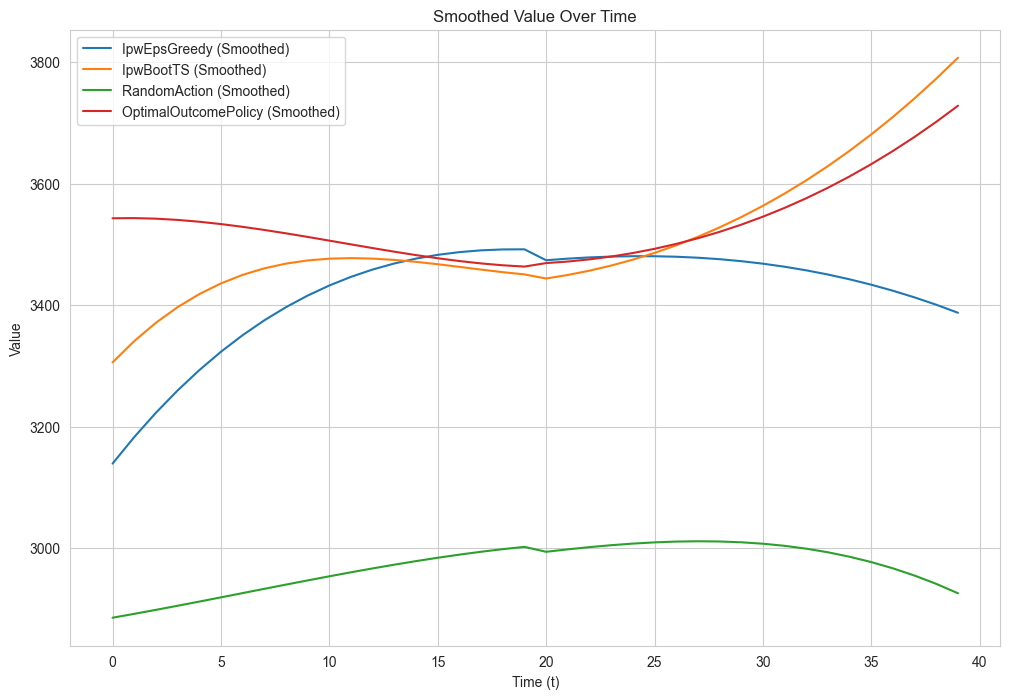

In [30]:
# Adjusting window length for the dataset size
# Finding an appropriate window length (it must be odd and less than the size of the dataset)

# Ensuring window_length is odd and smaller than the dataset size
if len(data) < window_length or window_length % 2 == 0:
    window_length = min(len(data) - 1, window_length)
    if window_length % 2 == 0:  # If even, subtract 1 to make it odd
        window_length -= 1

# Re-applying Savitzky-Golay filter with the adjusted window length
data['IpwEpsGreedy_smooth'] = savgol_filter(data['IpwEpsGreedy'], window_length, poly_order)
data['IpwBootTS_smooth'] = savgol_filter(data['IpwBootTS'], window_length, poly_order)
data['RandomAction_smooth'] = savgol_filter(data['RandomAction'], window_length, poly_order)
data['OptimalOutcomePolicy_smooth'] = savgol_filter(data['optimal_outcome_policy'], window_length, poly_order)

plt.figure(figsize=(12, 8))

# Plotting the smoothed data
plt.plot(data.index, data['IpwEpsGreedy_smooth'], label='IpwEpsGreedy (Smoothed)')
plt.plot(data.index, data['IpwBootTS_smooth'], label='IpwBootTS (Smoothed)')
plt.plot(data.index, data['RandomAction_smooth'], label='RandomAction (Smoothed)')
plt.plot(data.index, data['OptimalOutcomePolicy_smooth'], label='OptimalOutcomePolicy (Smoothed)')

plt.title('Smoothed Value Over Time')
plt.xlabel('Time (t)')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

plt.show()


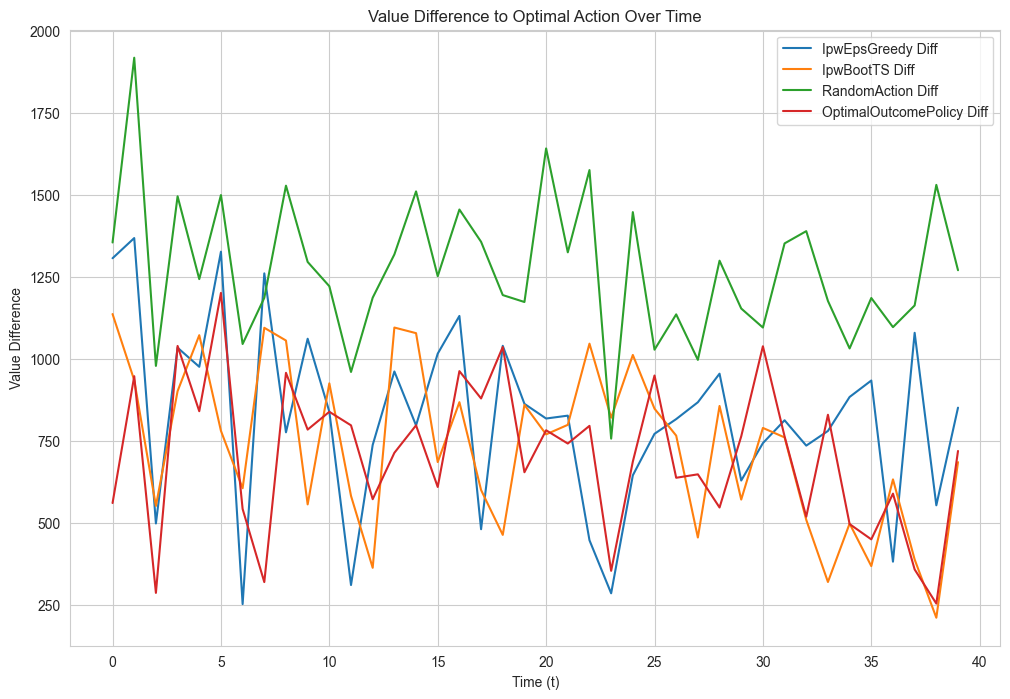

In [31]:
# Modifying the values by subtracting the current value from the optimal action value
data_modified = data.copy()  # Creating a copy to modify values

# Subtracting the current values from the optimal action value for selected columns
data_modified['IpwEpsGreedy_diff'] = data['optimal_outcome_actions'] - data['IpwEpsGreedy']
data_modified['IpwBootTS_diff'] = data['optimal_outcome_actions'] - data['IpwBootTS']
data_modified['RandomAction_diff'] = data['optimal_outcome_actions'] - data['RandomAction']
data_modified['OptimalOutcomePolicy_diff'] = data['optimal_outcome_actions'] - data['optimal_outcome_policy']

plt.figure(figsize=(12, 8))

# Plotting the modified data
plt.plot(data_modified.index, data_modified['IpwEpsGreedy_diff'], label='IpwEpsGreedy Diff')
plt.plot(data_modified.index, data_modified['IpwBootTS_diff'], label='IpwBootTS Diff')
plt.plot(data_modified.index, data_modified['RandomAction_diff'], label='RandomAction Diff')
plt.plot(data_modified.index, data_modified['OptimalOutcomePolicy_diff'], label='OptimalOutcomePolicy Diff')

plt.title('Value Difference to Optimal Action Over Time')
plt.xlabel('Time (t)')
plt.ylabel('Value Difference')
plt.legend()
plt.grid(True)

plt.show()


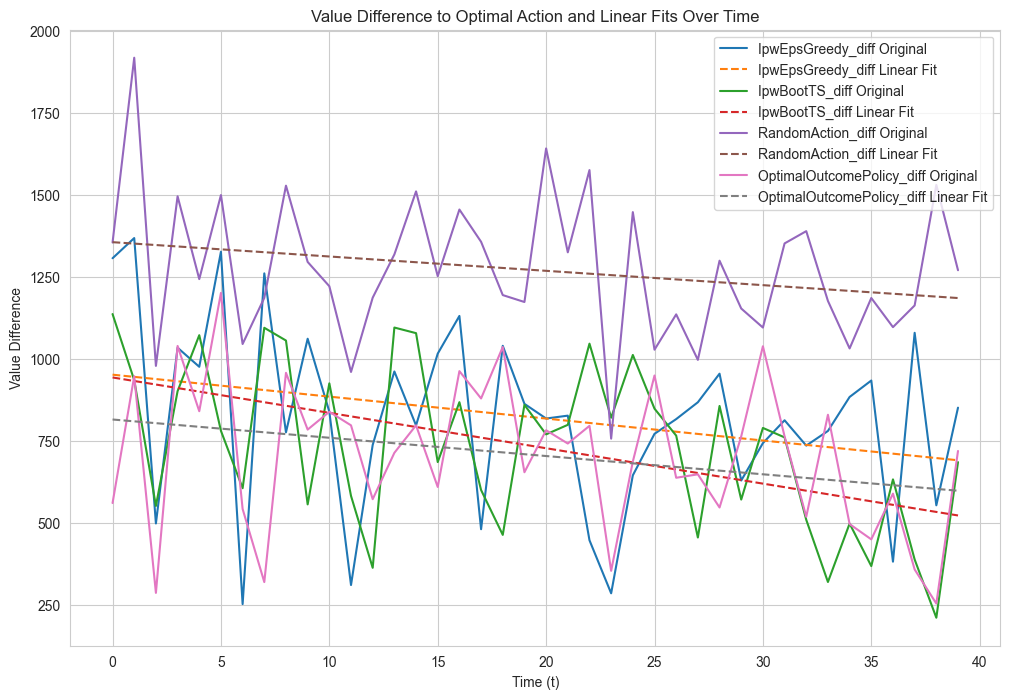

{'IpwEpsGreedy_diff': {'slope': -6.689911018329302,
  'intercept': 952.7606720518963},
 'IpwBootTS_diff': {'slope': -10.788952574868626,
  'intercept': 944.3007828636146},
 'RandomAction_diff': {'slope': -4.367519941481708,
  'intercept': 1356.7600337757651},
 'OptimalOutcomePolicy_diff': {'slope': -5.567604284717103,
  'intercept': 816.0961228561109}}

In [32]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Preparing data for linear regression
X = data_modified.index.values.reshape(-1, 1)  # Time as independent variable

# Initialize linear regression model
model = LinearRegression()

# Dictionary to store models for each column
models = {}

# Columns to fit linear models on
columns = ['IpwEpsGreedy_diff', 'IpwBootTS_diff', 'RandomAction_diff', 'OptimalOutcomePolicy_diff']

# Fitting linear models and storing coefficients
for col in columns:
    y = data_modified[col].values.reshape(-1, 1)  # Value differences as dependent variable
    model.fit(X, y)
    models[col] = {'slope': model.coef_[0][0], 'intercept': model.intercept_[0]}

# Plotting the original data and linear fits
plt.figure(figsize=(12, 8))

for col in columns:
    plt.plot(data_modified.index, data_modified[col], label=f'{col} Original')
    # Generating linear fit line
    linear_fit = models[col]['slope'] * data_modified.index + models[col]['intercept']
    plt.plot(data_modified.index, linear_fit, label=f'{col} Linear Fit', linestyle='--')

plt.title('Value Difference to Optimal Action and Linear Fits Over Time')
plt.xlabel('Time (t)')
plt.ylabel('Value Difference')
plt.legend()
plt.grid(True)

plt.show()

models


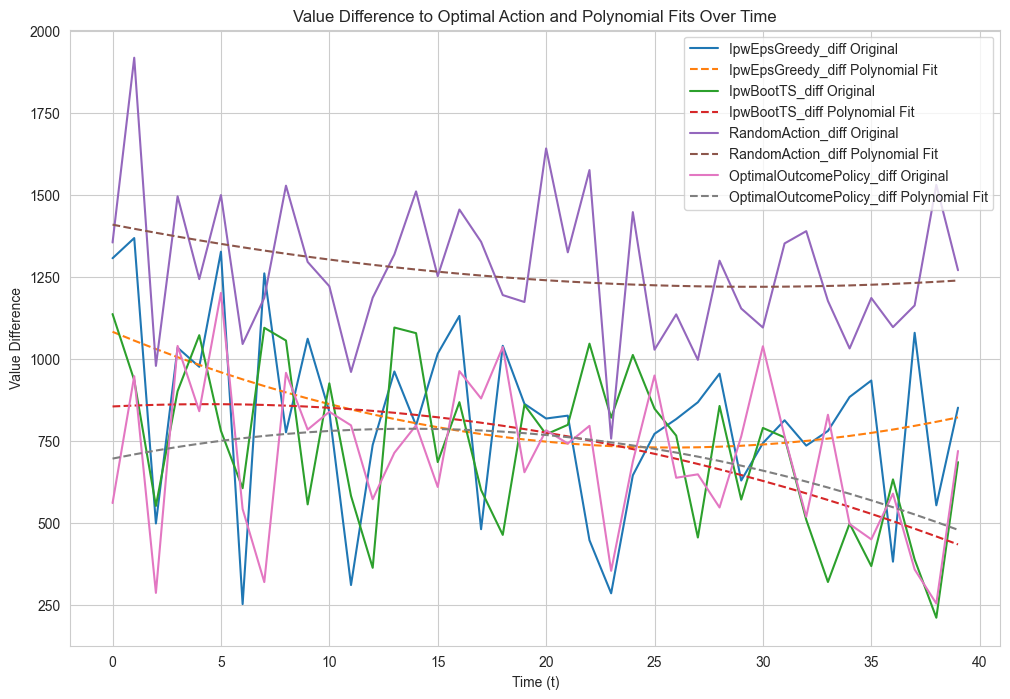

In [33]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Initialize polynomial regression model (degree 2 for a simple curve)
degree = 2
poly_models = {}

plt.figure(figsize=(12, 8))

for col in columns:
    y = data_modified[col].values.reshape(-1, 1)
    
    # Creating a pipeline that first transforms features to polynomial features, then fits a linear model
    poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    poly_model.fit(X, y)
    poly_models[col] = poly_model
    
    # Plotting the original data
    plt.plot(data_modified.index, y, label=f'{col} Original')
    
    # Predicting values using the polynomial model
    y_poly_pred = poly_model.predict(X)
    
    # Plotting the polynomial fit
    plt.plot(data_modified.index, y_poly_pred, label=f'{col} Polynomial Fit', linestyle='--')

plt.title('Value Difference to Optimal Action and Polynomial Fits Over Time')
plt.xlabel('Time (t)')
plt.ylabel('Value Difference')
plt.legend()
plt.grid(True)

plt.show()
